# Loading the data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
df = pd.read_csv('newark_data_noaa.csv')
print ( 'Dataframe shape:', df.shape)
df.head(2)

Dataframe shape: (17305, 14)


,year,mo,da,temp,dewp,visib,wdsp,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
0,2007,1,24,34.0,18.0,10.0,8.4,0.00,0,0,0,0,0,0
1,2007,2,1,29.3,13.4,9.9,7.8,0.01,0,0,0,0,0,0


In [3]:
print ('unique year:', df['year'].unique() )
print ('unique month:', df['mo'].unique() )
print ('unique day:', df['da'].unique() )

unique year: [2007 2016 1990 1993 2020 2015 2013 2009 1975 2010 2014 1973 1978 2011
 1976 2002 1986 1988 1977 1992 1980 2000 1979 1985 2003 1982 1974 1995
 1983 1981 1994 2006 2004 1984 2019 1999 2005 1996 2001 2017 1998 2012
 1997 1991 2018 1987 1989 2008]
unique month: [ 1  2  4  5  7  8  9 10 11 12  3  6]
unique day: [24  1  7 23  9 10 13 21  4 31 19 25 29 18 30  3 11 22  5 20 27 14 28 15
  2 16 12 26  8 17  6]


### Convert Year, Month and Day columns into a single column as a YYYY-MM-DD format.

In [4]:
df['date'] = pd.to_datetime(df[['year', 'mo', 'da']].astype(str).agg('-'.join, axis=1))
df.head(2)

,year,mo,da,temp,dewp,visib,wdsp,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,date
0,2007,1,24,34.0,18.0,10.0,8.4,0.00,0,0,0,0,0,0,2007-01-24
1,2007,2,1,29.3,13.4,9.9,7.8,0.01,0,0,0,0,0,0,2007-02-01


In [5]:
df = df.set_index('date')
df = df.drop(['year', 'mo', 'da'], axis=1).sort_index()  #drop the individual Y, M, D columns and sort as dates
df.head(2)

,temp,dewp,visib,wdsp,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
date,,,,,,,,,,,
1973-01-01,58.9,46.7,13.9,11.9,0.0,0,1,0,0,0,0
1973-01-02,41.0,23.9,18.6,11.4,0.0,0,0,0,0,0,0


In [6]:
df.tail(2)

,temp,dewp,visib,wdsp,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
date,,,,,,,,,,,
2020-05-17,60.9,46.4,10.0,7.0,0.0,0,0,0,0,0,0
2020-05-18,55.6,47.6,10.0,4.5,0.0,1,0,0,0,0,10000


## Preliminary visualization

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


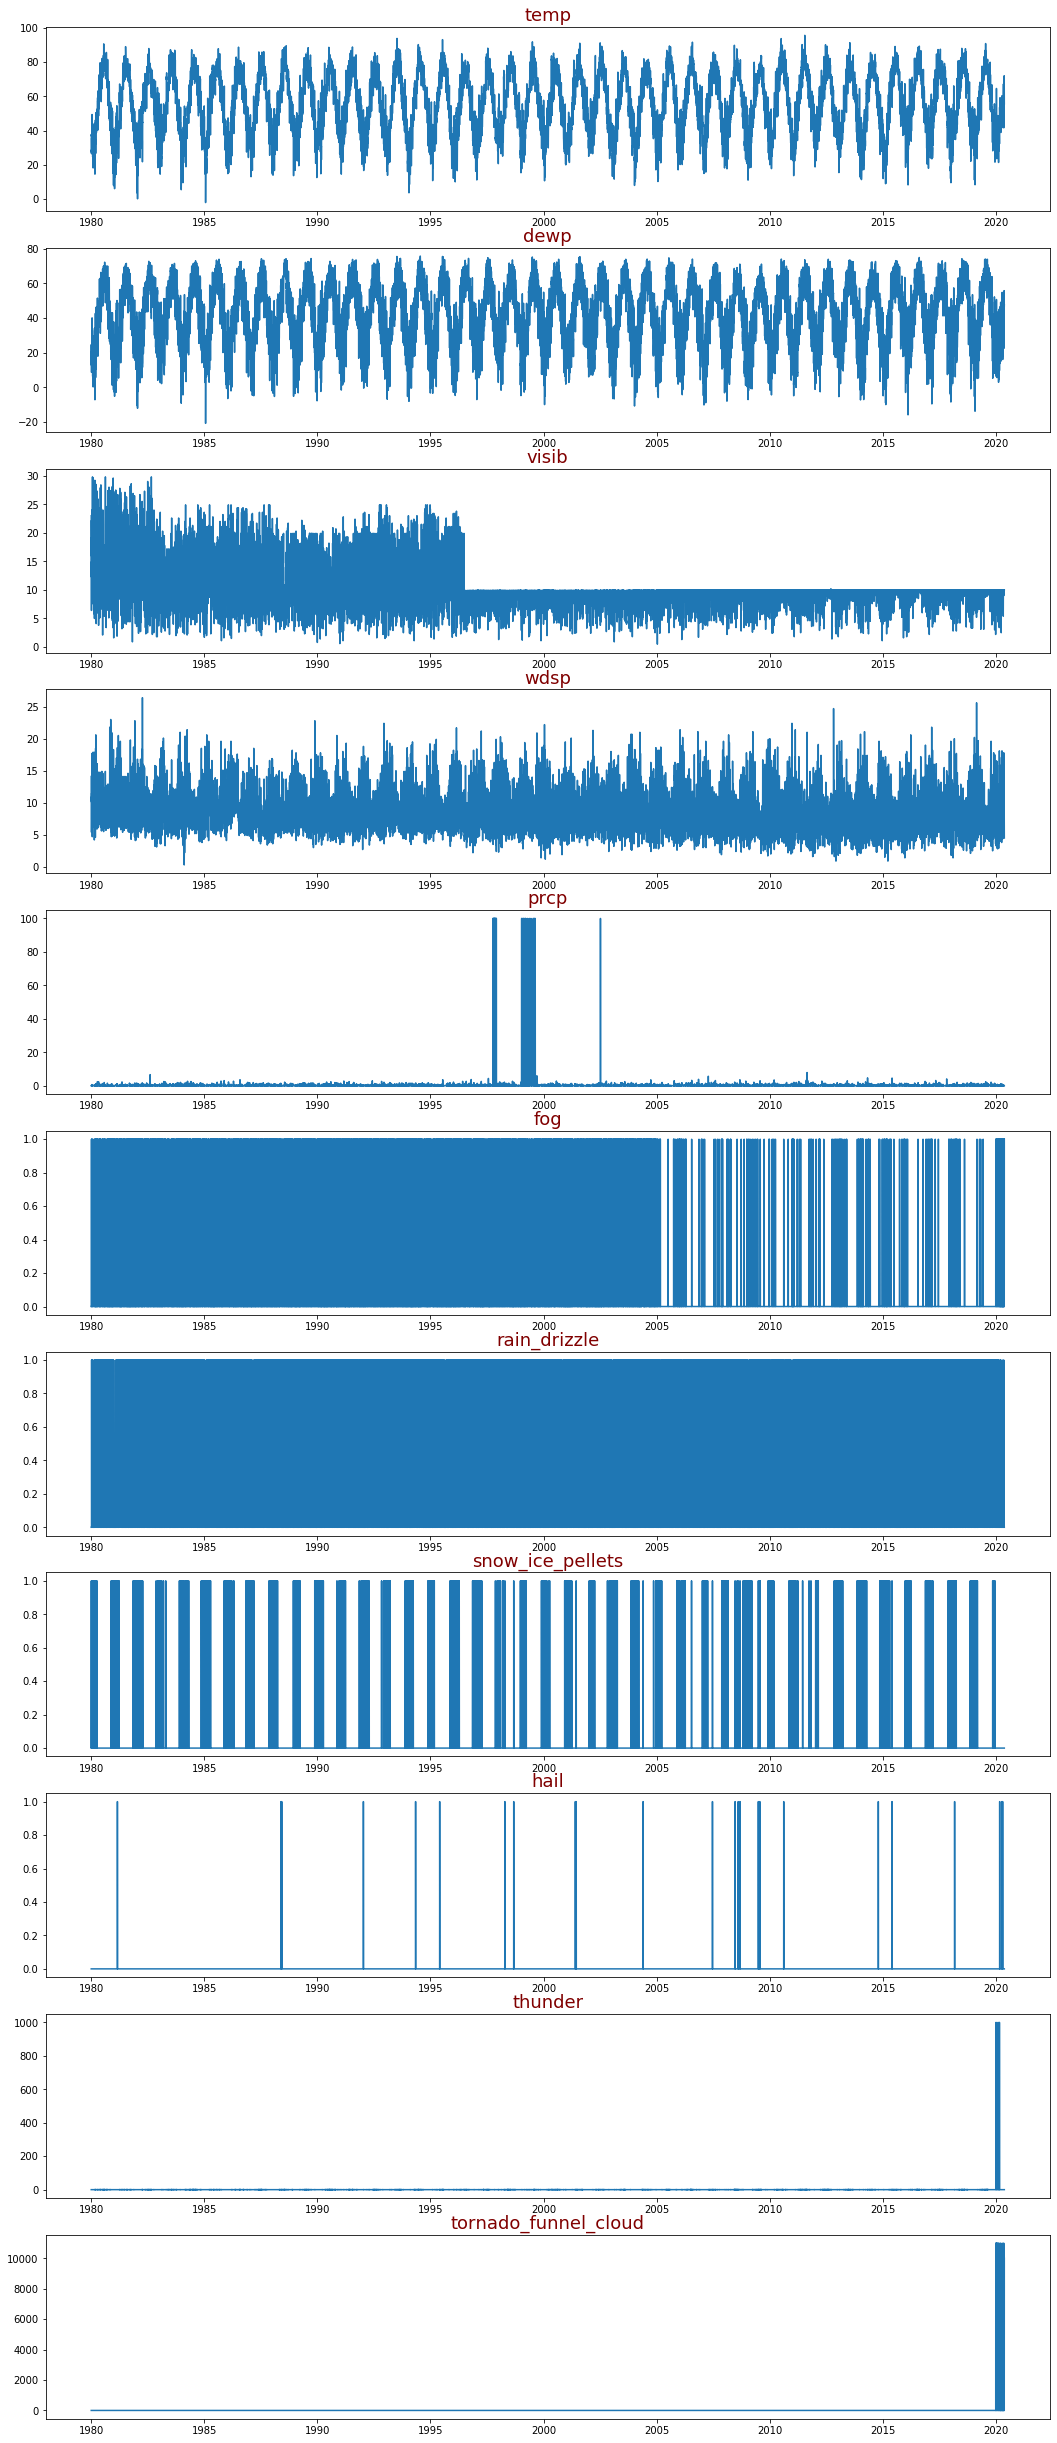

In [7]:

df = df['1980-01-01':]

plt.figure(figsize=(18,4*len(df.columns)))
for i, col in enumerate(df.columns):
    plt.subplot(len(df.columns),1,i+1)
    plt.title(col, fontsize=18, color='maroon')
    plt.plot(df.index, df[col])
    

In [3]:
df_co= pd.read_csv('ad_viz_plotval_data_CO.csv', parse_dates=True, index_col='Date').sort_index()
df_pb= pd.read_csv('ad_viz_plotval_data_Pb.csv', parse_dates=True, index_col='Date').sort_index()
df_oz= pd.read_csv('ad_viz_plotval_data_Ozone.csv', parse_dates=True, index_col='Date').sort_index()
df_no= pd.read_csv('ad_viz_plotval_data_NO2.csv', parse_dates=True, index_col='Date').sort_index()


In [7]:
df_no.tail()

,Source,Site ID,POC,Daily Max 1-hour NO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
Date,,,,,,,,,,,,,,,,,,,
2019-12-27,AQS,340130003,1,34.2,ppb,32,Newark Firehouse,24,100.0,42602,Nitrogen dioxide (NO2),35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,13,Essex,40.720989,-74.192892
2019-12-28,AQS,340130003,1,33.9,ppb,31,Newark Firehouse,24,100.0,42602,Nitrogen dioxide (NO2),35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,13,Essex,40.720989,-74.192892
2019-12-29,AQS,340130003,1,34.9,ppb,32,Newark Firehouse,21,88.0,42602,Nitrogen dioxide (NO2),35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,13,Essex,40.720989,-74.192892
2019-12-30,AQS,340130003,1,23.7,ppb,22,Newark Firehouse,24,100.0,42602,Nitrogen dioxide (NO2),35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,13,Essex,40.720989,-74.192892
2019-12-31,AQS,340130003,1,25.5,ppb,24,Newark Firehouse,24,100.0,42602,Nitrogen dioxide (NO2),35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,13,Essex,40.720989,-74.192892


Data for each gases is available until the following date.
* df_co.index  : '1996-01-01' - '2019-12-31'
* df_pb.index  : '2012-01-04' - '2019-12-29'
* df_oz.index  : '1996-01-01' - '2020-05-23'
* df_no.index  : '1996-01-01' - '2019-12-31'


In [9]:
dfc = df_co['Daily Max 8-hour CO Concentration']
dfz = df_oz['Daily Max 8-hour Ozone Concentration']
dfp = df_pb['Daily Mean Pb Concentration']

dfn_ = df_no['Daily Max 1-hour NO2 Concentration']

dfn = dfn_.reset_index().drop_duplicates(subset='Date', keep='first').set_index('Date')

#dfc = df_co['Daily Max 8-hour CO Concentration']
#dfp = df_oz['Daily Max 8-hour Ozone Concentration']
#dfn = df_no['Daily Max 1-hour NO2 Concentration']
#dfo = df_no['Daily Max 1-hour NO2 Concentration']


#df = df_no['Daily Max 1-hour NO2 Concentration']
#dff_2 = dff.reset_index().drop_duplicates(subset='Date', keep='first').set_index('Date')

In [10]:
df_gas = pd.concat( [dfc, dfz, dfp, dfn], axis=1, sort=True )

In [11]:
df_gas.tail()

,Daily Max 8-hour CO Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean Pb Concentration,Daily Max 1-hour NO2 Concentration
Date,,,,
2020-05-19,NaN,0.039,NaN,NaN
2020-05-20,NaN,0.037,NaN,NaN
2020-05-21,NaN,0.031,NaN,NaN
2020-05-22,NaN,0.028,NaN,NaN
2020-05-23,NaN,0.035,NaN,NaN


In [12]:
df= df_gas.dropna()

In [13]:
df.tail()

,Daily Max 8-hour CO Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean Pb Concentration,Daily Max 1-hour NO2 Concentration
Date,,,,
2019-12-05,0.4,0.031,0.000,29.9
2019-12-11,0.3,0.020,0.000,21.4
2019-12-17,0.5,0.024,0.003,27.6
2019-12-23,0.6,0.019,0.013,42.9
2019-12-29,0.9,0.016,0.001,34.9


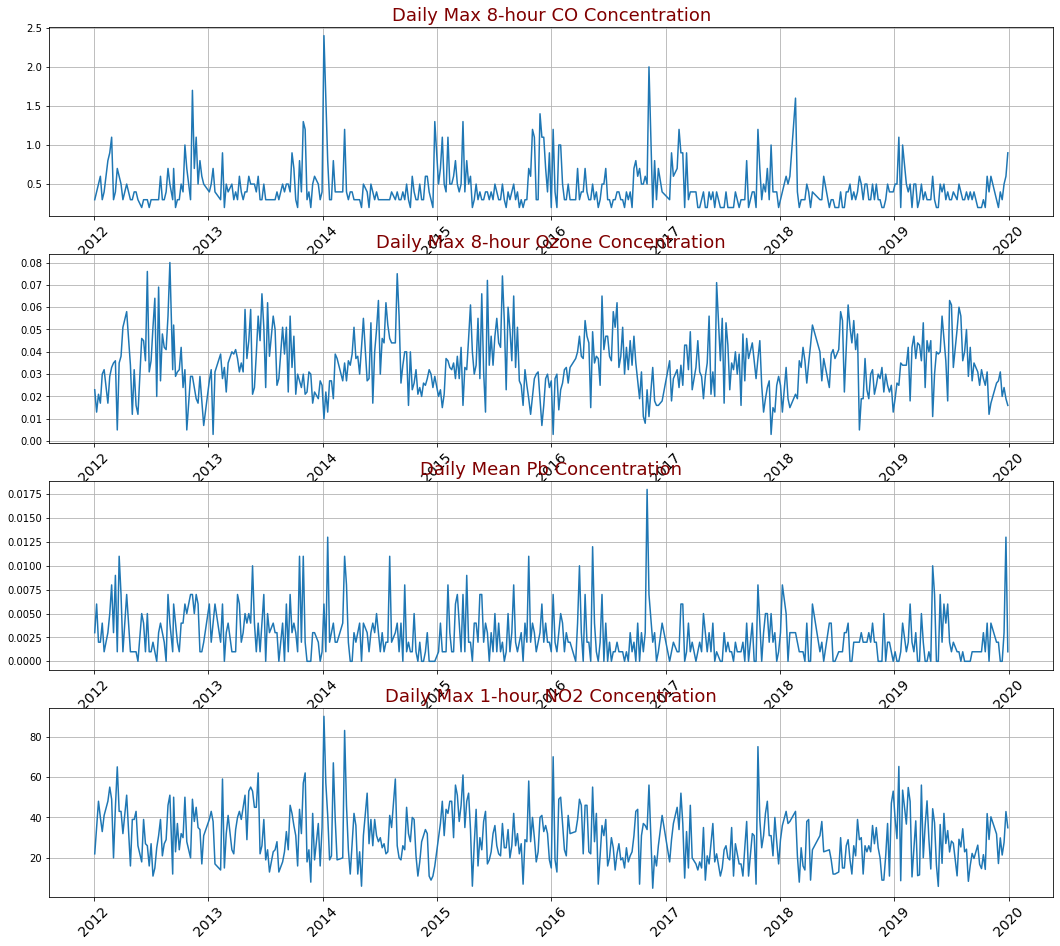

In [14]:
gasL = ['CO', 'Ozon', 'Pb', 'NO2']
plt.figure(figsize=(18,16))
for i, col in enumerate(df.columns):
    plt.subplot(4,1, 1+i)
    plt.title(col, fontsize=18, color='maroon')
    plt.plot(df.index, df[col])
    plt.xticks(fontsize=14, rotation=45)
    plt.grid()
plt.show()

### Seasonal Naive method

In [19]:
#The Seasonal Naïve Method

gas_cols = {'NO2': ['Daily Max 1-hour NO2 Concentration', 'DAILY_AQI_VALUE'], 
            'CO' : ['Daily Max 8-hour CO Concentration', 'DAILY_AQI_VALUE' ],
            'Pb' : ['Daily Mean Pb Concentration', 'DAILY_AQI_VALUE'],
            'Ozone': ['Daily Max 8-hour Ozone Concentration', 'DAILY_AQI_VALUE']}

def seasonal_naive(dff, df_train, df_test, n_period, gas='NO2'):
    cols = gas_cols[gas]    
    df_pred = dff.copy()
    for date in df_test.Date.values:
        indx = df_pred.loc[ dff.Date == date  ].index[0] - n_period*365
        for col in cols:
            preds = df_pred[col][indx]
            df_pred.loc[ dff.Date == date, col ] = preds
    return df_pred

In [16]:
df_no= pd.read_csv('ad_viz_plotval_data_NO2_site_3.csv')
df_no['Date'] = pd.to_datetime(df_no['Date'])
df_no = df_no.sort_values(by='Date')

cols_to_drop=['Source', 'Site ID', 'POC', 'UNITS', 'Site Name', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE',
              'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE',
              'STATE', 'COUNTY_CODE', 'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE']

df_no = df_no.drop(columns=cols_to_drop)
df_no.head(2)
#df_no.tail()

,Date,Daily Max 1-hour NO2 Concentration,DAILY_AQI_VALUE
0,2011-01-13,23.0,22
1,2011-01-14,44.0,42


In [17]:
df_train = df_no.loc[ df_no.Date < datetime(2018, 1, 1)  ].copy()
df_test = df_no.loc[ df_no.Date >= datetime(2018, 1, 1)  ].copy()

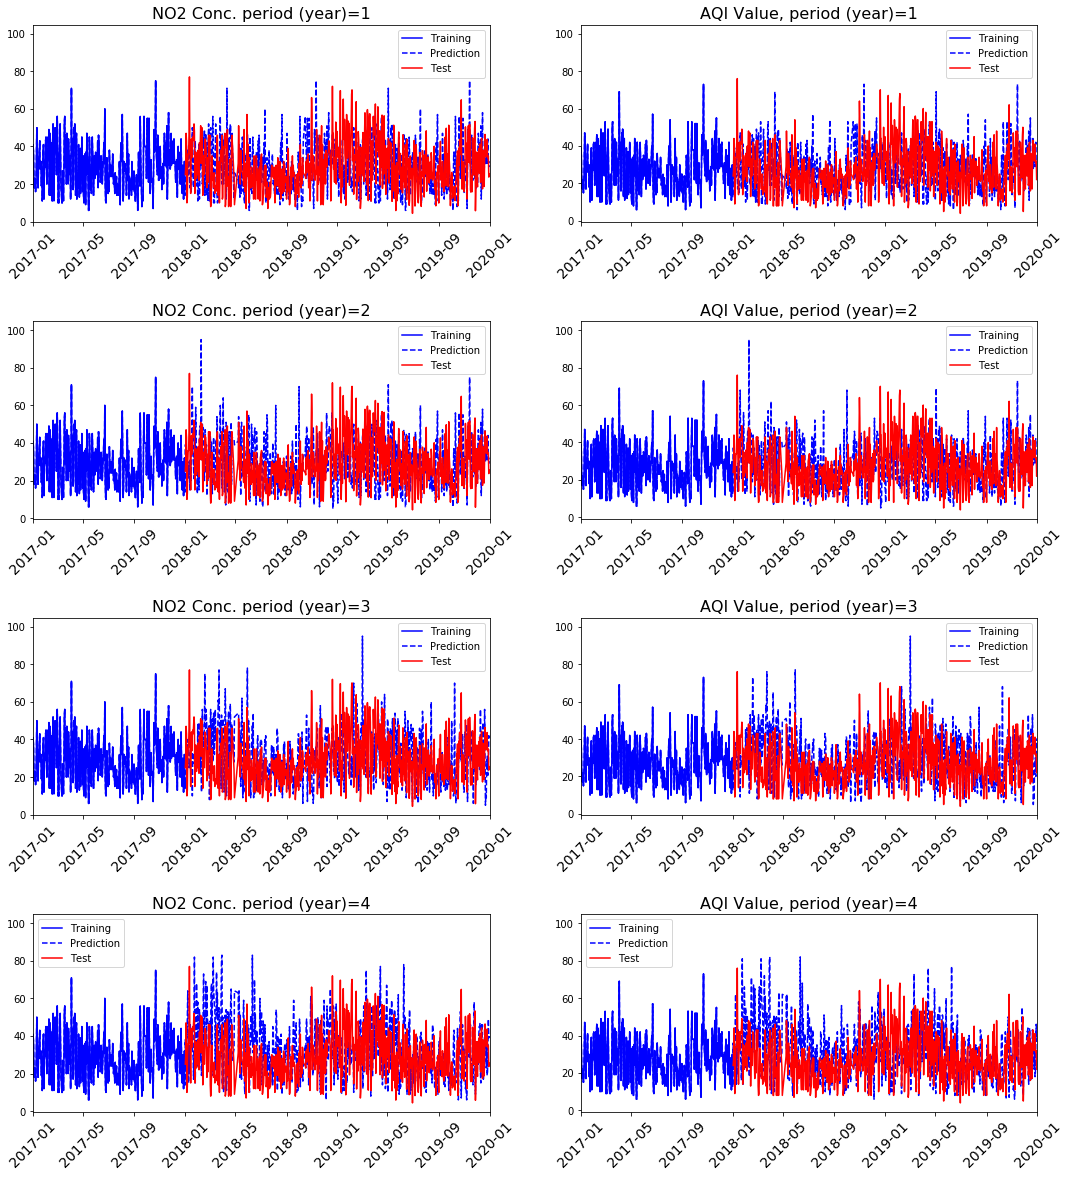

In [20]:


plt.figure(figsize=(18,20))
for i, n_period in enumerate([1,2,3,4]):
    df_pred = seasonal_naive(df_no, df_train, df_test, n_period, gas='NO2')
    
    plt.subplot(4,2,1+i*2)
    plt.title('NO2 Conc. period (year)='+str(n_period) , fontsize=16)
    plt.plot(df_train.Date, df_train['Daily Max 1-hour NO2 Concentration'], 'b', label='Training')
    plt.plot(df_pred.Date,  df_pred['Daily Max 1-hour NO2 Concentration'], 'b--', label='Prediction')
    plt.plot(df_test.Date,  df_test['Daily Max 1-hour NO2 Concentration'], 'r', label='Test')
    plt.legend()
    plt.xlim([datetime(2017,1,1), datetime(2020,1,1) ])
    plt.xticks(fontsize=14, rotation=45)
    
    plt.subplot(4,2,1+i*2+1)
    plt.title('AQI Value, period (year)='+str(n_period) , fontsize=16)
    plt.plot(df_train.Date, df_train['DAILY_AQI_VALUE'], 'b', label='Training')
    plt.plot(df_pred.Date,  df_pred['DAILY_AQI_VALUE'], 'b--', label='Prediction')
    plt.plot(df_test.Date,  df_test['DAILY_AQI_VALUE'], 'r', label='Test')
    plt.legend()
    plt.xlim([datetime(2017,1,1), datetime(2020,1,1) ])
    plt.xticks(fontsize=14, rotation=45)
    plt.subplots_adjust(hspace=0.5)

    
    

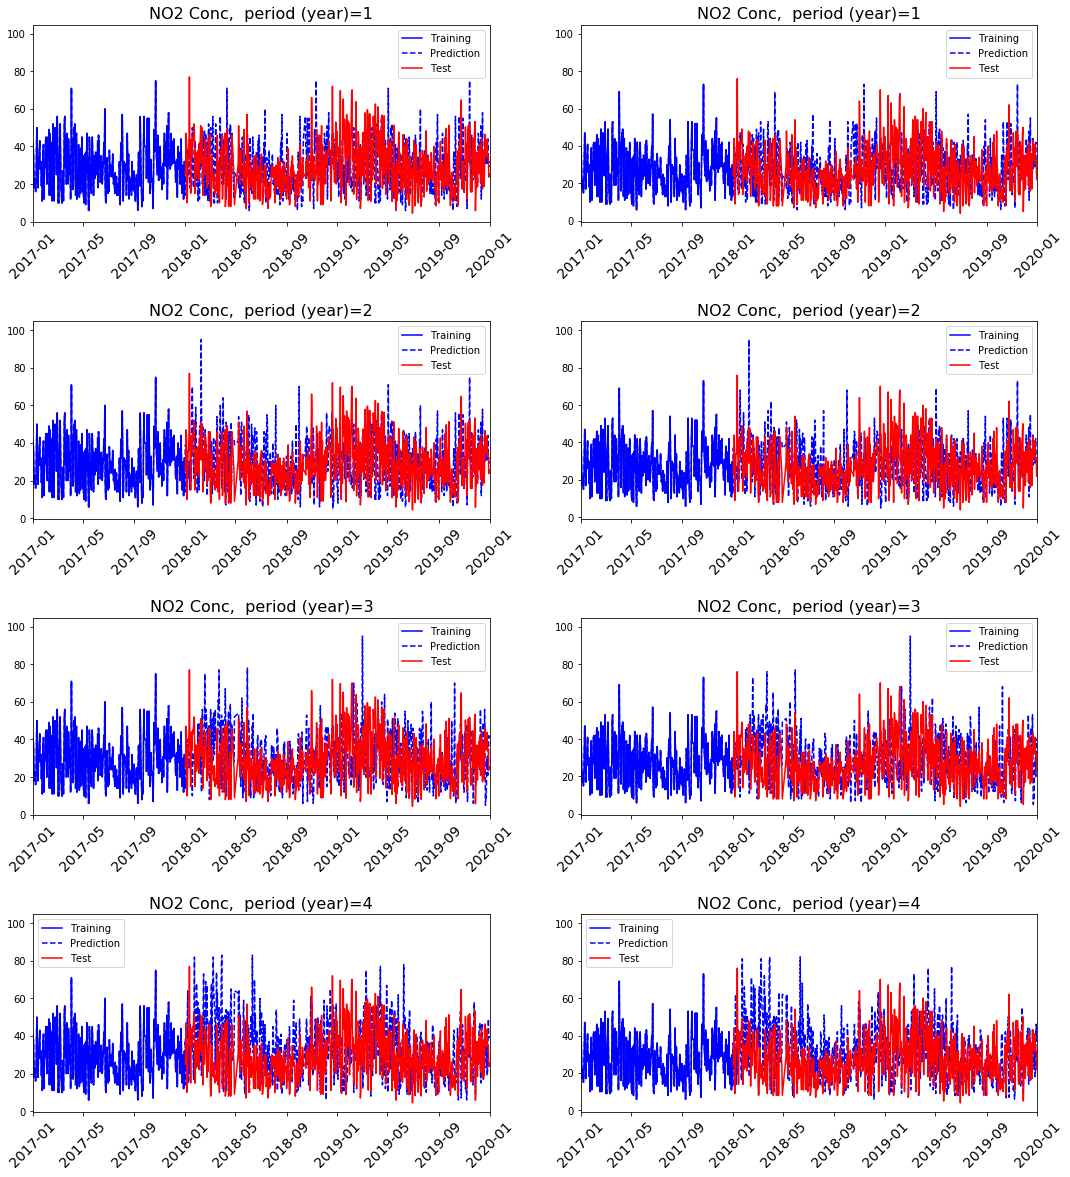

In [21]:

def Plot_(gas, df, df_train, df_test):
    
    cols=gas_cols[gas]
    plt.figure(figsize=(18,20))
    for i, n_period in enumerate([1,2,3,4]):
        df_pred = seasonal_naive(df, df_train, df_test, n_period, gas)
        for j in range(2):
            plt.subplot(4,2,1+i*2+j)
            plt.title(gas+' Conc,  period (year)='+str(n_period) , fontsize=16)
            
            plt.plot(df_train.Date, df_train[cols[j]], 'b', label='Training')
            plt.plot(df_pred.Date,  df_pred[cols[j]], 'b--', label='Prediction')
            plt.plot(df_test.Date,  df_test[cols[j]], 'r', label='Test')
            plt.legend()
            plt.xlim([datetime(2017,1,1), datetime(2020,1,1) ])
            plt.xticks(fontsize=14, rotation=45)
            plt.subplots_adjust(hspace=0.5)
            
Plot_('NO2', df_no, df_train, df_test)

In [22]:
#Ozone data
df_oz= pd.read_csv('ad_viz_plotval_data_Ozone_site_3.csv')
df_oz['Date'] = pd.to_datetime(df_oz['Date'])

df_oz = df_oz.sort_values(by='Date')
cols_to_drop= [ 'Source', 'Site ID', 'POC', 'UNITS', 'Site Name', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE',
               'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'STATE',
               'COUNTY_CODE', 'COUNTY', 'SITE_LATITUDE','SITE_LONGITUDE']

df_oz = df_oz.drop(columns=cols_to_drop)
df_oz.tail(2)

df_train = df_oz.loc[ df_oz.Date < datetime(2018, 1, 1)  ].copy()
df_test = df_oz.loc[ df_oz.Date >= datetime(2018, 1, 1)  ].copy()

In [23]:
#CO data
df_co= pd.read_csv('ad_viz_plotval_data_CO_site_3.csv')
df_co['Date'] = pd.to_datetime(df_co['Date'])
df_co = df_co.sort_values(by='Date')

cols_to_drop = [ 'Source', 'Site ID', 'POC', 'UNITS', 'Site Name', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE',
                'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'STATE',
                'COUNTY_CODE', 'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE']

df_co = df_co.drop(columns=cols_to_drop)
df_co.tail(2)

df_train = df_co.loc[ df_co.Date < datetime(2018, 1, 1)  ].copy()
df_test = df_co.loc[ df_co.Date >= datetime(2018, 1, 1)  ].copy()

# Lag and Autocorrelation

In [24]:
def make_lag_df(df, feature, lag):
    lag_df = df.copy()
    lag_df[feature + '_lag'] = np.nan
    
    lag_df.loc[lag:,feature + '_lag'] = lag_df.loc[0:len(lag_df)-(lag+1),feature].values
    return lag_df


def get_autocorr(df, feature, lag):
    df = make_lag_df(df, feature, lag)
    mean_y = df[feature].mean()
    
    y_ts = df[feature].values
    y_lags = df.dropna()[feature + '_lag'].values
    
    numerator = np.sum((y_ts[lag:] - mean_y)*(y_lags - mean_y))
    denom = np.sum(np.power(y_ts - mean_y,2))
    
    return numerator/denom

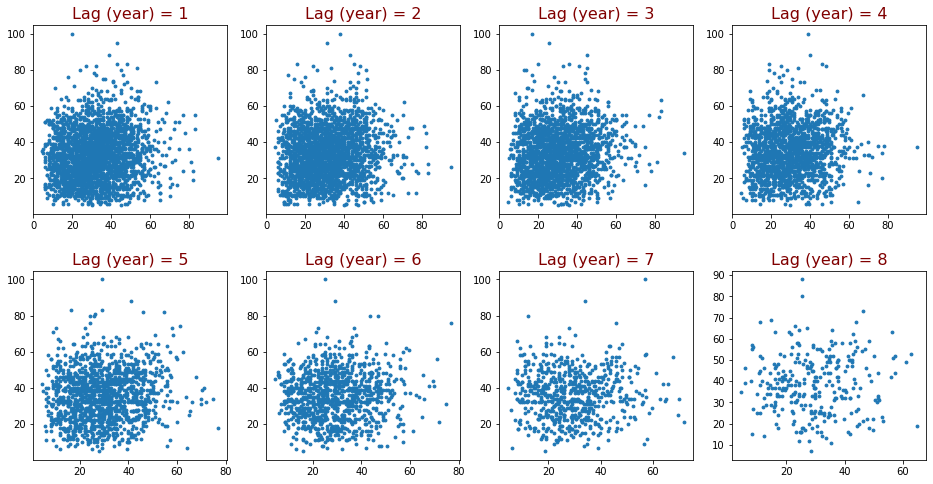

In [25]:

plt.figure(figsize=(16,8))
for i in range(1,9):
    feature = 'Daily Max 1-hour NO2 Concentration'
    lag_df = make_lag_df(df_no, feature, i*365)

    plt.subplot(2,4, i)
    plt.title('Lag (year) = '+str(i), fontsize=16, color='maroon')
    plt.scatter(lag_df[feature], lag_df[feature+'_lag'], s=8)
    plt.subplots_adjust(hspace=0.3)


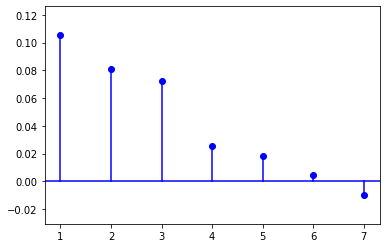

In [26]:
feature = 'Daily Max 1-hour NO2 Concentration'
N=8
plt.scatter(np.arange(1,N,1), [get_autocorr(df_no,feature,lag) for lag in 365*np.arange(1,N,1)], c='b')

for i in np.arange(1,N,1):
    plt.plot(i*np.ones(2),[0,get_autocorr(df_no,feature,i*365)],'b')

plt.axhline(y=0, xmin=0, xmax=N, color = "blue")

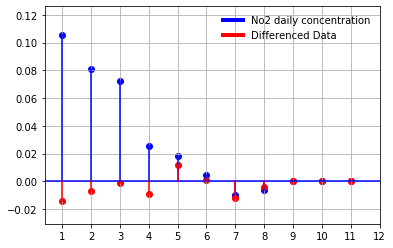

In [29]:
autos_no = []
n=12;
for i in range(1,n,1):
    autos_no.append(get_autocorr(df_no,feature,i*365))
plt.scatter(range(1,n,1), autos_no, c='b')

for i in range(1,n,1):
    plt.plot(i*np.ones(2),[0,autos_no[i-1]],'b')
    
plt.axhline(y=0, c='b')

auto_diff_no = []
diff_data = df_no.diff().dropna().reset_index(drop=True)

for i in range(1,n,1):
    auto_diff_no.append(get_autocorr(diff_data,feature,i*365))
    
plt.scatter(range(1,n,1), auto_diff_no, c='r')

for i in range(1,n,1):
    plt.plot(i*np.ones(2),[0,auto_diff_no[i-1]],'r')
plt.grid()

plt.xticks(range(1,13));


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4)]

plt.legend(custom_lines, ['No2 daily concentration', 'Differenced Data'], frameon=False);


# ARIMA Model

In [30]:
from statsmodels.tsa.api import ARIMA

In [31]:
feature = 'Daily Max 1-hour NO2 Concentration'

df_train = df_no.loc[ df_no.Date <  datetime(2018, 1, 1)  ].copy()
df_test  = df_no.loc[ df_no.Date >= datetime(2018, 1, 1)  ].copy()

df_train[feature].values
arima = ARIMA(df_train[feature].values, order = (1,0,1))
arima_fit = arima.fit()

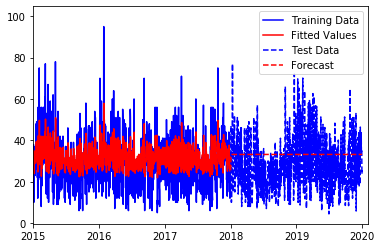

In [32]:
plt.plot(df_train.Date, df_train[feature], 'b', label='Training Data')
plt.plot(df_train.Date, arima_fit.fittedvalues, 'r', label='Fitted Values')
plt.plot(df_test.Date, df_test[feature], 'b--', label='Test Data')
plt.plot(df_test.Date, arima_fit.forecast(len(df_test[feature]))[0], 'r--', label='Forecast')
plt.legend();
plt.xlim( [datetime(2015,1,1), datetime(2020,2,1) ] );

# Testing data and code

In [ ]:
dates1 = ['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-01']
dates2 = ['2010-01-01', '2010-01-03', '2010-01-05', '2010-01-06', '2010-01-08', '2010-01-09', '2010-01-03']
dates3 = ['2010-01-01', '2010-01-03', '2010-01-05', '2010-01-06', '2010-01-09', '2010-01-11', '2010-01-05']

x1 = np.arange(2,len(dates1)+2)+10
x2 = np.arange(2,len(dates1)+2)+100

x3 = np.arange(2,len(dates2)+2)+20
x4 = np.arange(2,len(dates2)+2)+200

x5 = np.arange(2,len(dates3)+2)+ 30
x6 = np.arange(2,len(dates3)+2)+ 300

print (len(x1), len(x2), len(x3), len(x4), len(x5), len(x6), len(dates1) )

df1 = pd.DataFrame({'dates':dates1, 'x1':x1, 'x2':x2}).set_index('dates').drop_duplicates(keep='first')
df2 = pd.DataFrame({'dates':dates2, 'x3':x3, 'x4':x4}).set_index('dates').sort_index()
df3 = pd.DataFrame({'dates':dates3, 'x5':x5, 'x6':x6}).set_index('dates').sort_index()

print ( df1.shape )
#print ( df2.shape )
#print ( df3.shape )

df1
#df_3 = pd.concat([df1, df2, df3], axis=1, sort=True)
#print (df_3.shape)
#df_3

# Temperature plots

In [39]:
df = pd.read_csv('newark_data_noaa.csv')
print ( 'Dataframe shape:', df.shape)
df['date'] = pd.to_datetime(df[['year', 'mo', 'da']].astype(str).agg('-'.join, axis=1))
#df = df.set_index('date')
#drop the individual Y, M, D columns and sort as dates and sort by dates
df = df.drop(['year', 'mo', 'da'], axis=1).sort_values(by='date')  
df.tail(2)

Dataframe shape: (17305, 14)


,temp,dewp,visib,wdsp,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,date
1041,60.9,46.4,10.0,7.0,0.0,0,0,0,0,0,0,2020-05-17
1045,55.6,47.6,10.0,4.5,0.0,1,0,0,0,0,10000,2020-05-18


In [49]:
#Seasonal Naive:
def seasonal_naive(dff, df_train, df_test, n_period, feature):
    df_pred = dff.copy()
    for date in df_test.date.values:
        indx = df_pred.loc[ dff.date == date  ].index[0] - n_period*365
        preds = df_pred[feature][indx]
        df_pred.loc[ dff.date == date, feature ] = preds
    return df_pred



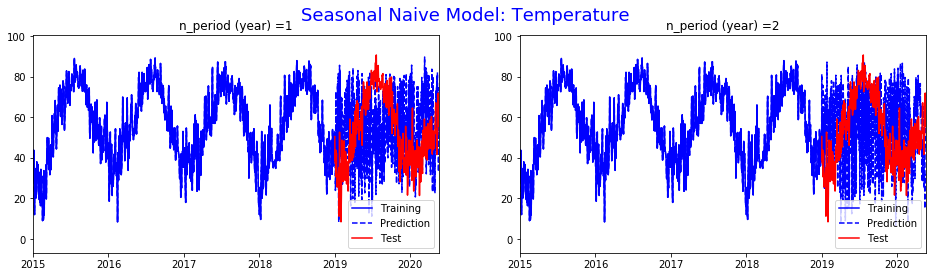

In [64]:

df_train = df.loc[ df.date < datetime(2019, 1, 1)  ].copy()
df_test = df.loc[ df.date >= datetime(2019, 1, 1)  ].copy()


plt.figure(figsize=(16,4))
plt.suptitle('Seasonal Naive Model: Temperature', color='blue', fontsize=18)
for n in [1, 2]:
    df_pred = seasonal_naive(df, df_train, df_test, n, feature='temp')
    
    plt.subplot(1,2,n)
    plt.title('n_period (year) ='+str(n))
    plt.plot(df_train.date, df_train['temp'], 'b', label='Training')
    plt.plot(df_pred.date,  df_pred['temp'], 'b--', label='Prediction')
    plt.plot(df_test.date,  df_test['temp'], 'r', label='Test')
    plt.legend()
    plt.xlim( [datetime(2015,1,1), datetime(2020,5,19) ] );
